# Deskripsi Data

Sumber Dataset: https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews?select=animes.csv

Dalam penelitian ini akan digunakan dataset Anime yang diunduh pada tanggal 10 November 2022 dari situs web Kaggle. Dataset Anime memiliki informasi diantaranya ada Data Anime (16K), Data Profil User (47k), dan Data Ulasan (130k). Dataset Anime tersebut sebelumnya merupakan dataset yang dicrawling dari situs web https://myanimelist.net/ pada tanggal 05/01/20 dan dibagikan secara open source melalui situs web Kaggle.

Dataset Anime terbagi ke dalam 3 file yang berbeda. File-file tersebut beserta informasinya sebagai berikut:
<ol type=1>
    <li> animes.csv: File ini berisikan daftar informasi tentang anime. Adapun file ini berupa tabel data dengan kolom data diantaranya adalah </li>
        <ul type="disc">
            <li> uid (ID anime), </li>
            <li> title (Judul anime), </li>
            <li> synopsis (sinopsis anime), </li>
            <li> genre (genre anime), </li>
            <li> aired (Tanggal tayang anime), </li>
            <li> episodes (Jumlah episode anime), </li>
            <li> members, </li>
            <li> popularity, </li>
            <li> ranked, </li>
            <li> score, </li>
            <li> img_url, </li>
            <li> link. </li>
        </ul>
    <li> profiles.csv: File ini berisikan informasi tentang user yang menonton anime. Adapun file ini berupa tabel data dengan kolom data diantaranya adalah
        <ul type="disc">
            <li> profile (profil unik user), </li>
            <li> gender (jenis kelamin user), </li>
            <li> birthday (tanggal lahir user), </li>
            <li> favorites_anime (referensi id anime yang disukai user), </li>
            <li> link (link url user). </li>
        </ul>
    <li> reviews.csv: File ini berisikan informasi mengenai ulasan yang diberikan oleh user terhadap anime. Adapun file ini berupa tabel data dengan kolom data diantaranya adalah </li>
        <ul type="disc">
            <li> uid (Id ulasan), </li>
            <li> profile (referensi profil), </li>
            <li> anime_uid (referensi anime), </li>
            <li> text (teks ulasan), </li>
            <li> score (skor rating keseluruhan),</li>
            <li> scores (semua rincian skor rating), </li>
            <li> link (link url ulasan). </li>
        </ul>
</ol>

# Import Library

In [ ]:
!pip install scikit-surprise

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import ndcg_score, recall_score, precision_score

from google.colab import drive
drive.mount('/content/drive')

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Load Dataset

In [ ]:
path = "drive/My Drive/Tugas Akhir/"

In [ ]:
df_1 = pd.read_csv(path + "animes.csv")
df_2 = pd.read_csv(path + "profiles.csv")
df_3 = pd.read_csv(path + "reviews.csv")

# Pre-Processing Data

## Olah Data animes.csv (Data Item)

### Informasi Data

In [ ]:
df_animes1 = df_1.copy()
df_animes1.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [ ]:
df_animes1.shape

(19311, 12)

In [ ]:
df_animes1.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [ ]:
df_animes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [ ]:
len(df_animes1["uid"].unique())

16216

### Menghapus kolom data yang tidak diperlukan

In [ ]:
df_animes2 = df_animes1.drop((["aired", "episodes", "members",
                               "popularity", "ranked", "score", "img_url", "link"]), axis =1)
df_animes2.columns

Index(['uid', 'title', 'synopsis', 'genre'], dtype='object')

### Merapikan data kolom 'genre'

In [ ]:
df_animes3 = df_animes2.copy()
df_animes3['genre'] = df_animes2['genre'].str.replace(r"[\[\]']", "", regex=True)
df_animes3.head()

,uid,title,synopsis,genre
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Comedy, Sports, Drama, School, Shounen"
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Drama, Music, Romance, School, Shounen"
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Sci-Fi, Adventure, Mystery, Drama, Fantasy"
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Action, Military, Adventure, Comedy, Drama, Ma..."
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Action, Mystery, Supernatural, Vampire"


### Mengubah Nama Kolom Data

In [ ]:
df_animes4 = df_animes3.copy()

dic_anime_col = {'uid':'Anime_Id', 'title':'Anime_Title', 'synopsis':'Anime_Synopsis', 'genre':'Anime_Genre'}
df_animes4.rename(columns=dic_anime_col,inplace=True)
df_animes4.columns

Index(['Anime_Id', 'Anime_Title', 'Anime_Synopsis', 'Anime_Genre'], dtype='object')

### Menghapus Baris Data Duplikat

In [ ]:
df_animes5 = df_animes4.sort_values('Anime_Id', ascending=True)
df_animes5 = df_animes5.reset_index(drop=True, inplace=False)
df_animes5.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","Action, Adventure, Comedy, Drama, Sci-Fi, Space"
2,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","Action, Drama, Mystery, Sci-Fi, Space"
3,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","Action, Drama, Mystery, Sci-Fi, Space"
4,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"


In [ ]:
df_animes6 = df_animes5.drop_duplicates(subset="Anime_Id", keep="last")
df_animes6 = df_animes6.reset_index(drop=True, inplace=False)
df_animes6.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,"Action, Magic, Police, Supernatural, Drama, My..."
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,"Adventure, Fantasy, Shounen, Supernatural"


## Olah Data profiles.csv (Data User)

### Informasi Data

In [ ]:
df_profiles1 = df_2.copy()
df_profiles1.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [ ]:
df_profiles1.shape

(81727, 5)

In [ ]:
df_profiles1.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')

In [ ]:
df_profiles1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [ ]:
len(df_profiles1["profile"].unique())

47885

### Drop kolom data yang tidak diperlukan

In [ ]:
df_profiles2 = df_profiles1.drop((["gender","birthday","link"]), axis =1)
df_profiles2.columns

Index(['profile', 'favorites_anime'], dtype='object')

### Merapikan data kolom 'favourites_anime'

In [ ]:
df_profiles3 = df_profiles2.copy()
df_profiles3['favorites_anime'] = df_profiles3['favorites_anime'].str.replace(r"[\[\]']", "", regex=True)
df_profiles3.head()

,profile,favorites_anime
0,DesolatePsyche,"33352, 25013, 5530, 33674, 1482, 269, 18245, 2..."
1,baekbeans,"11061, 31964, 853, 20583, 918, 9253, 34599, 35..."
2,skrn,"918, 2904, 11741, 17074, 23273, 32281, 9989, 1..."
3,edgewalker00,"5680, 849, 2904, 3588, 37349"
4,aManOfCulture99,"4181, 7791, 9617, 5680, 2167, 4382, 849, 235, ..."


### Mengubah nama kolom data

In [ ]:
df_profiles4 = df_profiles3.copy()

dic_user_col = {'profile':'User_Id', 'favorites_anime': 'User_Favorites_Anime'}
df_profiles4.rename(columns=dic_user_col,inplace=True)
df_profiles4.columns

Index(['User_Id', 'User_Favorites_Anime'], dtype='object')

### Menghapus Baris Data Duplikat

In [ ]:
df_profiles5 = df_profiles4.sort_values('User_Id', ascending=True)
df_profiles5 = df_profiles5.reset_index(drop=True, inplace=False)
df_profiles5.head()

,User_Id,User_Favorites_Anime
0,-----noname-----,"6774, 245, 2001, 11061, 16592, 1575, 21"
1,-----noname-----,"6774, 245, 2001, 11061, 16592, 1575, 21"
2,---SnowFlake---,"2904, 6773, 10790"
3,---SnowFlake---,"2904, 6773, 10790"
4,---was-----,


In [ ]:
df_profiles6 = df_profiles5.drop_duplicates(subset="User_Id", keep="last")
df_profiles6 = df_profiles6.reset_index(drop=True, inplace=False)
df_profiles6.head()

,User_Id,User_Favorites_Anime
0,-----noname-----,"6774, 245, 2001, 11061, 16592, 1575, 21"
1,---SnowFlake---,"2904, 6773, 10790"
2,---was-----,
3,--EYEPATCH--,
4,--Mizu--,"21, 177, 6864, 4081, 5678, 23289"


## Olah Data reviews.csv (Data Rating)

### Informasi Data

In [ ]:
df_reviews1 = df_3.copy()
df_reviews1.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [ ]:
df_reviews1.shape

(192112, 7)

In [ ]:
df_reviews1.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')

In [ ]:
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


### Menghapus row data duplicate

In [ ]:
len(df_reviews1["uid"].unique())

130519

In [ ]:
df_reviews2 = df_reviews1.sort_values('uid', ascending=True).reset_index(drop=True, inplace=False)
df_reviews2.head()

,uid,profile,anime_uid,text,score,scores,link
0,1,Xinil,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '8', 'Animation': '...",https://myanimelist.net/reviews.php?id=1
1,1,Xinil,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '8', 'Animation': '...",https://myanimelist.net/reviews.php?id=1
2,9,Crystal,856,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=9
3,10,Xinil,263,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=10
4,10,Xinil,263,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=10


In [ ]:
df_reviews3 = df_reviews2.drop_duplicates(subset=["uid"], keep="last")
df_reviews3 = df_reviews3.reset_index(drop=True, inplace=False)
df_reviews3.head()

,uid,profile,anime_uid,text,score,scores,link
0,1,Xinil,1,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '8', 'Animation': '...",https://myanimelist.net/reviews.php?id=1
1,9,Crystal,856,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=9
2,10,Xinil,263,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=10
3,11,Chelle,129,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '8', 'Animation': '6...",https://myanimelist.net/reviews.php?id=11
4,12,running_lemon,210,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '6', 'Animation': '8...",https://myanimelist.net/reviews.php?id=12


In [ ]:
len(df_reviews1["uid"].unique())

130519

### Drop kolom data yang tidak diperlukan

In [ ]:
df_reviews4 = df_reviews3.drop((["uid","text", "scores", "link"]), axis =1)
df_reviews4.columns

Index(['profile', 'anime_uid', 'score'], dtype='object')

### Mengubah nama kolom data

In [ ]:
df_reviews5 = df_reviews4.copy()

dic_review_col = {'profile':'User_Id', 'anime_uid': 'Anime_Id', 'score':'Rating_by_User'}
df_reviews5.rename(columns=dic_review_col,inplace=True)
df_reviews5.columns

Index(['User_Id', 'Anime_Id', 'Rating_by_User'], dtype='object')

## Data Final yang telah di pre-processing


### Data Item

In [ ]:
data_item = df_animes6.copy()
data_item.head()

In [ ]:
data_item.shape

In [ ]:
data_item.columns

In [ ]:
data_item.info()

In [ ]:
len(data_item['Anime_Id'].unique())

In [ ]:
sample_fraction = 0.2
data_item = data_item.sample(frac=sample_fraction, random_state=1)
data_item.info()

In [ ]:
# Tentukan path direktori drive
data_item_path = 'drive/My Drive/Tugas Akhir/data_final/data_item_final.csv'

# Simpan DataFrame ke dalam file CSV
data_item.to_csv(data_item_path, index=False)

print(f"DataFrame berhasil disimpan ke {data_item_path}")

### Data User

In [ ]:
data_user = df_profiles6.copy()
data_user.head()

In [ ]:
data_user.shape

In [ ]:
data_user.columns

In [ ]:
data_user.info()

In [ ]:
len(data_user['User_Id'].unique())

In [ ]:
sample_fraction = 0.2
data_user = data_user.sample(frac=sample_fraction, random_state=1)
data_user.info()

In [ ]:
# Tentukan path direktori drive
data_user_path = 'drive/My Drive/Tugas Akhir/data_final/data_user_final.csv'

# Simpan DataFrame ke dalam file CSV
data_user.to_csv(data_user_path, index=False)

print(f"DataFrame berhasil disimpan ke {data_user_path}")

### Data Rating

In [ ]:
data_rating = df_reviews5.copy()
data_rating.head()

In [ ]:
data_rating['Like'] = data_rating['Rating_by_User'].apply(lambda x: True if x >= 7 else False)
data_rating

In [ ]:
data_rating.shape

In [ ]:
data_rating.columns

In [ ]:
data_rating.info()

In [ ]:
# Dapatkan daftar item_id dan user_id yang tersisa
get_item_ids = data_item['Anime_Id'].unique()
get_user_ids = data_user['User_Id'].unique()

In [ ]:
# Filter data rating berdasarkan user_id dan item_id yang tersisa
data_rating = data_rating[
    (data_rating['Anime_Id'].isin(get_item_ids)) &
    (data_rating['User_Id'].isin(get_user_ids))
]
data_rating.info()

In [ ]:
# Tentukan path direktori drive
data_rating_path = 'drive/My Drive/Tugas Akhir/data_final/data_rating_final.csv'

# Simpan DataFrame ke dalam file CSV
data_rating.to_csv(data_rating_path, index=False)

print(f"DataFrame berhasil disimpan ke {data_rating_path}")

# Akses Data Final Yang Dipakai

## Informasi Data Item

In [ ]:
data_item_path = 'drive/My Drive/Tugas Akhir/data_final/data_item_final.csv'
data_item = pd.read_csv(data_item_path)
data_item.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre
0,39694,Pocari Sweat x Fuji Rock Festival ’17,A collaborative web commercial between the Jap...,Music
1,37194,Arigatou,A Minna no Uta music video sung by Keiko Uts...,"Music, Kids"
2,1367,Detective Conan Movie 08: Magician of the Silv...,"Once again, Kaitou Kid crosses swords with Con...","Adventure, Mystery, Comedy, Police, Shounen"
3,11583,Kami nomi zo Shiru Sekai: Natsu-iro Surprise,Music video included with KamiNomi OVA's theme...,Music
4,6094,A Piece of Phantasmagoria,A collection of 15 short episodes depicting th...,"Fantasy, Kids"


In [ ]:
data_item.shape

(3243, 4)

In [ ]:
data_item.columns

Index(['Anime_Id', 'Anime_Title', 'Anime_Synopsis', 'Anime_Genre'], dtype='object')

In [ ]:
data_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Anime_Id        3243 non-null   int64 
 1   Anime_Title     3243 non-null   object
 2   Anime_Synopsis  3099 non-null   object
 3   Anime_Genre     3232 non-null   object
dtypes: int64(1), object(3)
memory usage: 101.5+ KB


## Informasi Data User

In [ ]:
data_user_path = 'drive/My Drive/Tugas Akhir/data_final/data_user_final.csv'
data_user = pd.read_csv(data_user_path)
data_user.head()

,User_Id,User_Favorites_Anime
0,HokageEzio,NaN
1,limpet76,NaN
2,alk,NaN
3,Re-Animated,"263, 302, 1, 136, 2001, 17389, 12031, 11061"
4,Triple_R,"9756, 15051, 77, 117, 849"


In [ ]:
data_user.shape

(9577, 2)

In [ ]:
data_user.columns

Index(['User_Id', 'User_Favorites_Anime'], dtype='object')

In [ ]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_Id               9577 non-null   object
 1   User_Favorites_Anime  7511 non-null   object
dtypes: object(2)
memory usage: 149.8+ KB


## Informasi Data Rating

In [ ]:
data_rating_path = 'drive/My Drive/Tugas Akhir/data_final/data_rating_final.csv'
data_rating = pd.read_csv(data_rating_path)
data_rating.head()

,User_Id,Anime_Id,Rating_by_User,Like
0,martino,133,8,True
1,running_lemon,1210,10,True
2,infinity,257,3,False
3,Ceray,120,10,True
4,Nekokitsune,481,10,True


In [ ]:
data_rating.shape

(5428, 4)

In [ ]:
data_rating.columns

Index(['User_Id', 'Anime_Id', 'Rating_by_User', 'Like'], dtype='object')

In [ ]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_Id         5428 non-null   object
 1   Anime_Id        5428 non-null   int64 
 2   Rating_by_User  5428 non-null   int64 
 3   Like            5428 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 132.6+ KB


# Content Based Filtering

## K-Means Clustering

### Bag of Genre

In [ ]:
# Mendapatkan daftar genre unik
unique_genres = set()
for genres in data_item['Anime_Genre']:
    if isinstance(genres, str):
        genre_list = genres.split(', ')
        unique_genres.update(genre_list)

# Membuat kolom baru untuk setiap genre
for genre in unique_genres:
    data_item[genre] = 0

# Mengisi kolom genre dengan nilai biner
for index, row in data_item.iterrows():
    if isinstance(row['Anime_Genre'], str):
        genre_list = row['Anime_Genre'].split(', ')
        for genre in genre_list:
            data_item.at[index, genre] = 1

data_item.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre,Fantasy,Game,Adventure,Magic,Psychological,Historical,...,Supernatural,Shounen Ai,Harem,Slice of Life,Super Power,Shoujo Ai,Kids,Romance,Police,Action
0,39694,Pocari Sweat x Fuji Rock Festival ’17,A collaborative web commercial between the Jap...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37194,Arigatou,A Minna no Uta music video sung by Keiko Uts...,"Music, Kids",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1367,Detective Conan Movie 08: Magician of the Silv...,"Once again, Kaitou Kid crosses swords with Con...","Adventure, Mystery, Comedy, Police, Shounen",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11583,Kami nomi zo Shiru Sekai: Natsu-iro Surprise,Music video included with KamiNomi OVA's theme...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6094,A Piece of Phantasmagoria,A collection of 15 short episodes depicting th...,"Fantasy, Kids",1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Jalankan Algoritma K-Means

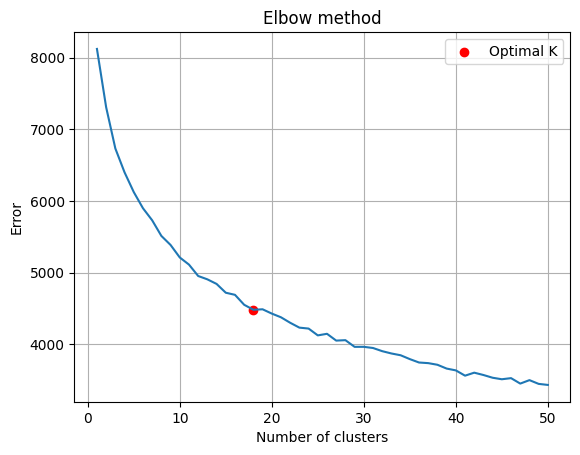

In [ ]:
# Mengambil kolom genre sebagai fitur untuk clustering
features = list(unique_genres)  # unique_genres dari langkah preprocessing sebelumnya
X = data_item[features].values

# Using the elbow method to find the optimal number of clusters
Error = []
n_cluster = range(1,51)

for i in n_cluster:
    kmeans = KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(n_cluster,Error)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.grid()

# Menemukan indeks titik optimal dengan metode siku
optimal_i = None
for i in range(1, len(Error) - 1):
    prev_error = Error[i - 1]
    curr_error = Error[i]
    next_error = Error[i + 1]

    if curr_error <= prev_error and curr_error <= next_error:
        optimal_i = i
        break

# Menandai titik optimal pada plot
optimal_n_cluster = n_cluster[optimal_i]
optimal_error = Error[optimal_i]
plt.scatter(optimal_n_cluster, optimal_error, color='red', label='Optimal K')
plt.legend()

plt.show()

In [ ]:
print(optimal_n_cluster)

18


In [ ]:
# Menentukan jumlah cluster (k)
k = optimal_n_cluster  # Berdasarkan hasil dari ELbow Method

# Melakukan k-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=18, random_state=42)

In [ ]:
# Mendapatkan label cluster untuk setiap data
cluster_labels = kmeans.labels_

# Menambahkan kolom cluster_labels ke DataFrame animes.csv
data_item['Cluster'] = cluster_labels

# Menampilkan hasil clustering
# Convert 'Anime_Genre' column to string type before splitting
data_item['Anime_Genre'] = data_item['Anime_Genre'].astype(str)
genres_str = [' '.join(map(str, genre.split(', '))) for genre in data_item['Anime_Genre']]
data_item['genres_str'] = genres_str
data_item.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre,Fantasy,Game,Adventure,Magic,Psychological,Historical,...,Harem,Slice of Life,Super Power,Shoujo Ai,Kids,Romance,Police,Action,Cluster,genres_str
0,39694,Pocari Sweat x Fuji Rock Festival ’17,A collaborative web commercial between the Jap...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Music
1,37194,Arigatou,A Minna no Uta music video sung by Keiko Uts...,"Music, Kids",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3,Music Kids
2,1367,Detective Conan Movie 08: Magician of the Silv...,"Once again, Kaitou Kid crosses swords with Con...","Adventure, Mystery, Comedy, Police, Shounen",0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,Adventure Mystery Comedy Police Shounen
3,11583,Kami nomi zo Shiru Sekai: Natsu-iro Surprise,Music video included with KamiNomi OVA's theme...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Music
4,6094,A Piece of Phantasmagoria,A collection of 15 short episodes depicting th...,"Fantasy, Kids",1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,9,Fantasy Kids


In [ ]:
#Simpan Hasil Cluster ke dalam file csv
# Tentukan path direktori drive
data_cluster_path = 'drive/My Drive/Tugas Akhir/data_final/data_cluster_final.csv'

# Simpan DataFrame ke dalam file CSV
data_item.to_csv(data_cluster_path, index=False)

print(f"DataFrame berhasil disimpan ke {data_cluster_path}")

DataFrame berhasil disimpan ke drive/My Drive/Tugas Akhir/data_final/data_cluster_final.csv


## Akses Data Cluster

In [ ]:
data_cluster_path = 'drive/My Drive/Tugas Akhir/data_final/data_cluster_final.csv'
data_cluster = pd.read_csv(data_cluster_path)
data_cluster.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre,Fantasy,Game,Adventure,Magic,Psychological,Historical,...,Harem,Slice of Life,Super Power,Shoujo Ai,Kids,Romance,Police,Action,Cluster,genres_str
0,39694,Pocari Sweat x Fuji Rock Festival ’17,A collaborative web commercial between the Jap...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Music
1,37194,Arigatou,A Minna no Uta music video sung by Keiko Uts...,"Music, Kids",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3,Music Kids
2,1367,Detective Conan Movie 08: Magician of the Silv...,"Once again, Kaitou Kid crosses swords with Con...","Adventure, Mystery, Comedy, Police, Shounen",0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,Adventure Mystery Comedy Police Shounen
3,11583,Kami nomi zo Shiru Sekai: Natsu-iro Surprise,Music video included with KamiNomi OVA's theme...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Music
4,6094,A Piece of Phantasmagoria,A collection of 15 short episodes depicting th...,"Fantasy, Kids",1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,9,Fantasy Kids


In [ ]:
unique_genres = set()
for genres in data_cluster['Anime_Genre']:
    if isinstance(genres, str):
        genre_list = genres.split(', ')
        unique_genres.update(genre_list)

print(unique_genres)

{'Dementia', 'Ecchi', 'Game', 'Music', 'Hentai', 'Samurai', 'Demons', 'School', 'Super Power', 'Mystery', 'Police', 'Parody', 'Comedy', 'Action', 'Slice of Life', 'Kids', 'Vampire', 'Seinen', 'Yaoi', 'Martial Arts', 'Fantasy', 'Shoujo Ai', 'Josei', 'Harem', 'Shoujo', 'Historical', 'Mecha', 'Thriller', 'Shounen Ai', 'Supernatural', 'Sports', 'Psychological', 'Cars', 'Shounen', 'Military', 'Adventure', 'Drama', 'Sci-Fi', 'Space', 'Magic', 'Yuri', 'Horror', 'Romance'}


In [ ]:
len(unique_genres)

43

In [ ]:
len(data_cluster['Cluster'].unique())

18

## TF-IDF (Using Synopsis Feature)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membuat daftar stopwords
stop_words = set(stopwords.words('english'))

# Fungsi untuk membersihkan dan memproses teks
def preprocess(text):
    # Handle non-string values
    if not isinstance(text, str):
        return ''  # Return an empty string for non-string values
    # Tokenisasi
    tokens = word_tokenize(text)
    # Menghapus stopwords dan simbol
    tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]
    # Gabungkan kembali menjadi string
    return ' '.join(tokens)

# Preroses synopsis
data_cluster['cleaned_synopsis'] = data_cluster['Anime_Synopsis'].apply(preprocess)

In [ ]:
data_cluster.head()

,Anime_Id,Anime_Title,Anime_Synopsis,Anime_Genre,Fantasy,Game,Adventure,Magic,Psychological,Historical,...,Slice of Life,Super Power,Shoujo Ai,Kids,Romance,Police,Action,Cluster,genres_str,cleaned_synopsis
0,39694,Pocari Sweat x Fuji Rock Festival ’17,A collaborative web commercial between the Jap...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,Music,collaborative web commercial Japanese sports d...
1,37194,Arigatou,A Minna no Uta music video sung by Keiko Uts...,"Music, Kids",0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,Music Kids,Minna Uta music video sung Keiko Utsumi animat...
2,1367,Detective Conan Movie 08: Magician of the Silv...,"Once again, Kaitou Kid crosses swords with Con...","Adventure, Mystery, Comedy, Police, Shounen",0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,Adventure Mystery Comedy Police Shounen,Kaitou Kid crosses swords Conan Edogawa annual...
3,11583,Kami nomi zo Shiru Sekai: Natsu-iro Surprise,Music video included with KamiNomi OVA's theme...,Music,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,Music,Music video included KamiNomi OVA theme single...
4,6094,A Piece of Phantasmagoria,A collection of 15 short episodes depicting th...,"Fantasy, Kids",1,0,0,0,0,0,...,0,0,0,1,0,0,0,9,Fantasy Kids,collection 15 short episodes depicting magic w...


In [ ]:
# Misalkan id1 dan id2 adalah ID item yang ingin dicetak
id1 = 0
id2 = 1

# Menampilkan sinopsis dan cleaned sinopsis untuk item dengan ID tertentu
print(f"Item ID {id1}:")
print("Anime Synopsis:", data_cluster.loc[id1, 'Anime_Synopsis'])
print("Cleaned Synopsis:", data_cluster.loc[id1, 'cleaned_synopsis'])
print()

print(f"Item ID {id2}:")
print("Anime Synopsis:", data_cluster.loc[id2, 'Anime_Synopsis'])
print("Cleaned Synopsis:", data_cluster.loc[id2, 'cleaned_synopsis'])

Item ID 0:
Anime Synopsis: A collaborative web commercial between the Japanese sports drink brand  Pocari Sweat  and the 2017 Fuji Rock Festival. It was posted to their official Facebook page May of 2017.
Cleaned Synopsis: collaborative web commercial Japanese sports drink brand Pocari Sweat 2017 Fuji Rock Festival posted official Facebook page May 2017

Item ID 1:
Anime Synopsis: A  Minna no Uta  music video sung by Keiko Utsumi and animated by Nanke Kouji. It has no relation to the  Minna no Uta  music video from 2010 which shares the name name.
Cleaned Synopsis: Minna Uta music video sung Keiko Utsumi animated Nanke Kouji relation Minna Uta music video 2010 shares name name


In [ ]:
# Menggunakan TfidfVectorizer untuk menghitung TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data_cluster['cleaned_synopsis'])
tfidf_matrix_normalized = normalize(tfidf_matrix)

In [ ]:
# Menghitung kemiripan kosinus
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.00870739],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00870739, ..., 0.        , 0.        ,
        1.        ]])

## Item Based Filtering

In [ ]:
# Convert the DataFrame into Surprise's format
reader = Reader(rating_scale=(data_rating['Rating_by_User'].min(), data_rating['Rating_by_User'].max()))
data = Dataset.load_from_df(data_rating[['User_Id', 'Anime_Id', 'Rating_by_User']], reader)

# Split the data into training and test sets
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Instantiate the SVD model
svd = SVD()

# Train the SVD model
svd.fit(trainset)

# Predict ratings for the testset
predictions = svd.test(testset)

In [ ]:
# Mengonversi predictions ke DataFrame
predictions_df = pd.DataFrame(predictions, columns=['User_Id', 'Anime_Id', 'Rating_by_User', 'Predicted_Rating', 'Details'])

# Menampilkan tabel predictions
predictions_df.head()

,User_Id,Anime_Id,Rating_by_User,Predicted_Rating,Details
0,Sonicfanx1,31845,7.0,6.527849,{'was_impossible': False}
1,NJ_animeluvr,28121,8.0,7.092939,{'was_impossible': False}
2,grazr,21507,5.0,5.929428,{'was_impossible': False}
3,_mow_,32668,8.0,7.153005,{'was_impossible': False}
4,molesys,2981,8.0,7.547361,{'was_impossible': False}


# Hybrid Filtering

## Filter 1-2-3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

class HybridRecommender:
    def __init__(self, data_item, data_rating, cosine_sim, svd_model, recommendation_folder):
        self.data_item = data_item
        self.data_rating = data_rating
        self.cosine_sim = cosine_sim
        self.svd_model = svd_model
        self.recommendation_folder = recommendation_folder

    def get_items_in_cluster(self, item_id):
        query_cluster = self.data_item.loc[self.data_item['Anime_Id'] == item_id, 'Cluster'].values[0]
        cluster_items = self.data_item.loc[self.data_item['Cluster'] == query_cluster]
        return cluster_items.drop(cluster_items[cluster_items['Anime_Id'] == item_id].index).reset_index(drop=True)

    def get_top_N_Similarity(self, item_id, N):
        items_in_cluster = self.get_items_in_cluster(item_id)
        item_index = self.data_item.loc[self.data_item['Anime_Id'] == item_id].index[0]
        similarities_in_cluster = self.cosine_sim[item_index][items_in_cluster.index]
        top_indices = np.argsort(similarities_in_cluster)[::-1][:N]
        return items_in_cluster.iloc[top_indices].reset_index(drop=True)

    def predict_ratings_for_items(self, user_id, item_ids):
        predictions = []
        for item_id in item_ids:
            prediction = self.svd_model.predict(user_id, item_id)
            predictions.append({
                'User_Id': user_id,
                'Anime_Id': item_id,
                'Predicted_Rating': prediction.est
            })
        return pd.DataFrame(predictions)

    def get_top_N_recommendations(self, user_id, item_id, N):
        top_N_Similarity = self.get_top_N_Similarity(item_id, 100)
        list_anime_id_top_N_Similarity = top_N_Similarity['Anime_Id'].tolist()
        predicted_ratings_df = self.predict_ratings_for_items(user_id, list_anime_id_top_N_Similarity)
        final_predicted_ratings_df = pd.merge(predicted_ratings_df, self.data_rating, on=['User_Id', 'Anime_Id'], how='left')
        top_N_rating_prediction = final_predicted_ratings_df.sort_values(by='Predicted_Rating', ascending=False).head(N)
        list_anime_id_top_N_rating_prediction = top_N_rating_prediction['Anime_Id'].tolist()
        filtered_df = self.data_item[self.data_item['Anime_Id'].isin(list_anime_id_top_N_rating_prediction)]
        top_N_rating_prediction['Anime_Title'] = filtered_df['Anime_Title'].tolist()
        top_N_rating_prediction['Anime_Genre'] = filtered_df['Anime_Genre'].tolist()
        return top_N_rating_prediction.sort_values(by='Predicted_Rating', ascending=False).reset_index(drop=True)

    def calculate_metrics(self, recommendations, actual_ratings, n):
        relevant_items = actual_ratings[actual_ratings['Rating_by_User'] >= 7]['Anime_Id'].tolist()
        recommended_items = recommendations['Anime_Id'].tolist()[:n]

        tp = len(set(recommended_items) & set(relevant_items))
        fp = len(set(recommended_items) - set(relevant_items))
        fn = len(set(relevant_items) - set(recommended_items))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return precision, recall, f1_score

    def evaluate_model(self, n):
        total_precision = 0
        total_recall = 0
        total_f1_score = 0
        count = 0

        # Loop through all recommendation files
        for file_name in os.listdir(self.recommendation_folder):
            if file_name.endswith('.csv'):
                file_path = os.path.join(self.recommendation_folder, file_name)
                recommendations = pd.read_csv(file_path)

                user_id = recommendations['User_Id'].iloc[0]
                actual_ratings = self.data_rating[self.data_rating['User_Id'] == user_id]

                for item_id in recommendations['Query_Anime_Id'].unique():
                    item_recommendations = recommendations[recommendations['Query_Anime_Id'] == item_id]
                    precision, recall, f1_score = self.calculate_metrics(item_recommendations, actual_ratings, n)

                    total_precision += precision
                    total_recall += recall
                    total_f1_score += f1_score
                    count += 1

        avg_precision = total_precision / count
        avg_recall = total_recall / count
        avg_f1_score = total_f1_score / count

        return avg_precision, avg_recall, avg_f1_score

# Contoh penggunaan
# data_item, data_rating, cosine_sim, dan svd_model diharapkan sudah didefinisikan sebelumnya
# Path to the directory where you want to save the files
output_directory = 'drive/My Drive/Tugas Akhir/get_recommendations' #'drive_path/recommendations'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

recommendation_folder = 'drive/My Drive/Tugas Akhir/get_recommendations'  # Ganti dengan path folder yang sesuai
recommender = HybridRecommender(data_cluster, data_rating, cosine_sim, svd, recommendation_folder)

In [ ]:
query_user_id = data_user['User_Id'].sample(n=1).iloc[0]
query_item_id = data_cluster['Anime_Id'].sample(n=1).iloc[0]
print(query_user_id, query_item_id)
top_10_recommendations = recommender.get_top_N_recommendations(user_id=query_user_id, item_id=query_item_id, N=10)
print(top_10_recommendations)

graytotoro 40157
      User_Id  Anime_Id  Predicted_Rating  Rating_by_User Like  \
0  graytotoro      5365          8.389166             NaN  NaN   
1  graytotoro     39533          8.264814             NaN  NaN   
2  graytotoro      1530          8.138545             NaN  NaN   
3  graytotoro       339          7.918079             NaN  NaN   
4  graytotoro       437          7.827520             NaN  NaN   
5  graytotoro      1589          7.762150             NaN  NaN   
6  graytotoro      7661          7.660585             NaN  NaN   
7  graytotoro     37490          7.569285             NaN  NaN   
8  graytotoro      2129          7.562796             NaN  NaN   
9  graytotoro      2225          7.470729             NaN  NaN   

                                         Anime_Title  \
0                               Alps no Shoujo Heidi   
1                                      Tsumiki no Ie   
2  Gyakuten Saiban: Sono "Shinjitsu", Igi Ari! Se...   
3                               

In [ ]:
# Ambil rating aktual dari user_id untuk item yang direkomendasikan
actual_ratings = recommender.data_rating[recommender.data_rating['User_Id'] == query_user_id]

# Hitung precision, recall, dan f1_score untuk top 10 rekomendasi
precision, recall, f1_score = recommender.calculate_metrics(top_10_recommendations, actual_ratings, n=10)

# Cetak hasil evaluasi
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


In [ ]:
import pandas as pd
import os
import time

# Loop through all users and all items
for user_id in data_user['User_Id']:
    file_name = f'user_{user_id}_recommendations.csv'
    file_path = os.path.join(output_directory, file_name)

    # Check if the file already exists
    if os.path.exists(file_path):
        print(f"File for User {user_id} already exists. Skipping.")
        continue  # Skip to the next user

    start_time = time.time()  # Start time
    print(f"{user_id} in progress")

    user_recommendations = []  # List to hold recommendations for the current user

    for item_id in data_cluster['Anime_Id']:
        top_10_recommendations = recommender.get_top_N_recommendations(user_id=user_id, item_id=item_id, N=10)

        # Ensure the recommendations are in a DataFrame format
        if isinstance(top_10_recommendations, list):
            top_10_recommendations_df = pd.DataFrame(top_10_recommendations)
        else:
            top_10_recommendations_df = top_10_recommendations

        # Add user_id and item_id columns to the DataFrame
        top_10_recommendations_df['User_Id'] = user_id
        top_10_recommendations_df['Query_Anime_Id'] = item_id

        # Append to the list
        user_recommendations.append(top_10_recommendations_df)

    # Concatenate all DataFrames for the current user into a single DataFrame
    user_recommendations_df = pd.concat(user_recommendations, ignore_index=True)

    # Save the DataFrame to a CSV file named based on the user_id
    user_recommendations_df.to_csv(file_path, index=False)

    end_time = time.time()  # End time
    duration = end_time - start_time  # Calculate the duration
    print(f"User {user_id} completed in {duration:.2f} seconds. Saved to {file_path}")

print("All recommendations saved to individual files in the recommendations folder.")


Output streaming akan dipotong hingga 5000 baris terakhir.
File for User RainWatcher already exists. Skipping.
File for User cherryjam already exists. Skipping.
File for User mclovin007 already exists. Skipping.
File for User DrDoom389 already exists. Skipping.
File for User Seamus_Gasai already exists. Skipping.
File for User Koward_Krusher already exists. Skipping.
File for User -WolfAmongUs- already exists. Skipping.
File for User Unchou already exists. Skipping.
File for User aibou_ already exists. Skipping.
File for User Doris_Mae already exists. Skipping.
File for User Benny_TheBenny already exists. Skipping.
File for User Yuokai already exists. Skipping.
File for User Mister_ermo already exists. Skipping.
File for User Narkeo already exists. Skipping.
File for User Haak already exists. Skipping.
File for User SenseiLeeR already exists. Skipping.
File for User Kuzuna already exists. Skipping.
File for User MG48282283 already exists. Skipping.
File for User Kelaihc already exists.

## Filter 1-3

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import time

class HybridRecommender2:
    def __init__(self, data_item, data_rating, svd_model, recommendation_folder):
        self.data_item = data_item
        self.data_rating = data_rating
        self.svd_model = svd_model
        self.recommendation_folder = recommendation_folder

    def get_items_in_cluster(self, item_id):
        query_cluster = self.data_item.loc[self.data_item['Anime_Id'] == item_id, 'Cluster'].values[0]
        cluster_items = self.data_item.loc[self.data_item['Cluster'] == query_cluster]
        return cluster_items.drop(cluster_items[cluster_items['Anime_Id'] == item_id].index).reset_index(drop=True)

    def predict_ratings_for_items(self, user_id, item_ids):
        predictions = []
        for item_id in item_ids:
            prediction = self.svd_model.predict(user_id, item_id)
            predictions.append({
                'User_Id': user_id,
                'Anime_Id': item_id,
                'Predicted_Rating': prediction.est
            })
        return pd.DataFrame(predictions)

    def get_top_N_recommendations(self, user_id, item_id, N):
        items_in_cluster = self.get_items_in_cluster(item_id)
        list_anime_id_in_cluster = items_in_cluster['Anime_Id'].tolist()
        predicted_ratings_df = self.predict_ratings_for_items(user_id, list_anime_id_in_cluster)
        final_predicted_ratings_df = pd.merge(predicted_ratings_df, self.data_rating, on=['User_Id', 'Anime_Id'], how='left')
        top_N_rating_prediction = final_predicted_ratings_df.sort_values(by='Predicted_Rating', ascending=False).head(N)
        list_anime_id_top_N_rating_prediction = top_N_rating_prediction['Anime_Id'].tolist()
        filtered_df = self.data_item[self.data_item['Anime_Id'].isin(list_anime_id_top_N_rating_prediction)]
        top_N_rating_prediction['Anime_Title'] = filtered_df['Anime_Title'].tolist()
        top_N_rating_prediction['Anime_Genre'] = filtered_df['Anime_Genre'].tolist()
        return top_N_rating_prediction.sort_values(by='Predicted_Rating', ascending=False).reset_index(drop=True)

    def calculate_metrics(self, recommendations, actual_ratings, n):
        relevant_items = actual_ratings[actual_ratings['Rating_by_User'] >= 7]['Anime_Id'].tolist()
        recommended_items = recommendations['Anime_Id'].tolist()[:n]

        tp = len(set(recommended_items) & set(relevant_items))
        fp = len(set(recommended_items) - set(relevant_items))
        fn = len(set(relevant_items) - set(recommended_items))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return precision, recall, f1_score

    def evaluate_model(self, n):
        total_precision = 0
        total_recall = 0
        total_f1_score = 0
        count = 0

        # Loop through all recommendation files
        for file_name in os.listdir(self.recommendation_folder):
            if file_name.endswith('.csv'):
                file_path = os.path.join(self.recommendation_folder, file_name)
                recommendations = pd.read_csv(file_path)

                user_id = recommendations['User_Id'].iloc[0]
                actual_ratings = self.data_rating[self.data_rating['User_Id'] == user_id]

                for item_id in recommendations['Query_Anime_Id'].unique():
                    item_recommendations = recommendations[recommendations['Query_Anime_Id'] == item_id]
                    precision, recall, f1_score = self.calculate_metrics(item_recommendations, actual_ratings, n)

                    total_precision += precision
                    total_recall += recall
                    total_f1_score += f1_score
                    count += 1

        avg_precision_2 = total_precision / count
        avg_recall_2 = total_recall / count
        avg_f1_score_2 = total_f1_score / count

        return avg_precision_2, avg_recall_2, avg_f1_score_2

# Example usage
# Save recommendations for all users
output_directory_2 = 'drive/My Drive/Tugas Akhir/get_recommendations_2'  # Update with the correct folder path
os.makedirs(output_directory_2, exist_ok=True)

recommendation_folder_2 = 'drive/My Drive/Tugas Akhir/get_recommendations_2'  # Update with the correct folder path
recommender_2 = HybridRecommender2(data_cluster, data_rating, svd, recommendation_folder_2)

In [ ]:
query_user_id_2 = query_user_id
query_item_id_2 = query_item_id
print(query_user_id_2, query_item_id_2)
top_10_recommendations_2 = recommender_2.get_top_N_recommendations(user_id=query_user_id_2, item_id=query_item_id_2, N=10)
print(top_10_recommendations_2)

graytotoro 40157
      User_Id  Anime_Id  Predicted_Rating  Rating_by_User Like  \
0  graytotoro      5365          8.389166             NaN  NaN   
1  graytotoro     39533          8.264814             NaN  NaN   
2  graytotoro      8425          8.180682             NaN  NaN   
3  graytotoro      1530          8.138545             NaN  NaN   
4  graytotoro     35180          8.037184             NaN  NaN   
5  graytotoro       339          7.918079             NaN  NaN   
6  graytotoro       437          7.827520             NaN  NaN   
7  graytotoro     28725          7.825541             NaN  NaN   
8  graytotoro       323          7.820769             NaN  NaN   
9  graytotoro      1589          7.762150             NaN  NaN   

                     Anime_Title  \
0                  Tsumiki no Ie   
1     3-gatsu no Lion 2nd Season   
2                      Bartender   
3                          Given   
4                   Perfect Blue   
5        Serial Experiments Lain   
6   

In [ ]:
# Ambil rating aktual dari user_id untuk item yang direkomendasikan
actual_ratings_2 = recommender_2.data_rating[recommender_2.data_rating['User_Id'] == query_user_id_2]

# Hitung precision, recall, dan f1_score untuk top 10 rekomendasi
precision_2, recall_2, f1_score_2 = recommender_2.calculate_metrics(top_10_recommendations_2, actual_ratings_2, n=10)

# Cetak hasil evaluasi
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1-Score: {f1_score_2:.4f}")

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


In [ ]:
for user_id in data_user['User_Id']:
    file_name = f'user_{user_id}_recommendations_2.csv'
    file_path = os.path.join(output_directory_2, file_name)

    if os.path.exists(file_path):
        print(f"File for User {user_id} already exists. Skipping.")
        continue

    start_time = time.time()
    print(f"{user_id} in progress")

    user_recommendations = []

    for item_id in data_cluster['Anime_Id']:
        top_10_recommendations = recommender_2.get_top_N_recommendations(user_id=user_id, item_id=item_id, N=10)
        if isinstance(top_10_recommendations, list):
            top_10_recommendations_df = pd.DataFrame(top_10_recommendations)
        else:
            top_10_recommendations_df = top_10_recommendations

        top_10_recommendations_df['User_Id'] = user_id
        top_10_recommendations_df['Query_Anime_Id'] = item_id
        user_recommendations.append(top_10_recommendations_df)

    user_recommendations_df = pd.concat(user_recommendations, ignore_index=True)
    user_recommendations_df.to_csv(file_path, index=False)

    end_time = time.time()
    duration = end_time - start_time
    print(f"User {user_id} completed in {duration:.2f} seconds. Saved to {file_path}")

print("All recommendations saved to individual files in the recommendations folder.")

Output streaming akan dipotong hingga 5000 baris terakhir.
File for User RainWatcher already exists. Skipping.
File for User cherryjam already exists. Skipping.
File for User mclovin007 already exists. Skipping.
File for User DrDoom389 already exists. Skipping.
File for User Seamus_Gasai already exists. Skipping.
File for User Koward_Krusher already exists. Skipping.
File for User -WolfAmongUs- already exists. Skipping.
File for User Unchou already exists. Skipping.
File for User aibou_ already exists. Skipping.
File for User Doris_Mae already exists. Skipping.
File for User Benny_TheBenny already exists. Skipping.
File for User Yuokai already exists. Skipping.
File for User Mister_ermo already exists. Skipping.
File for User Narkeo already exists. Skipping.
File for User Haak already exists. Skipping.
File for User SenseiLeeR already exists. Skipping.
File for User Kuzuna already exists. Skipping.
File for User MG48282283 already exists. Skipping.
File for User Kelaihc already exists.

## Filter 2-3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os

class HybridRecommender3:
    def __init__(self, data_item, data_rating, cosine_sim, svd_model, recommendation_folder):
        self.data_item = data_item
        self.data_rating = data_rating
        self.cosine_sim = cosine_sim
        self.svd_model = svd_model
        self.recommendation_folder = recommendation_folder

    def get_top_N_Similarity(self, item_id, N):
        item_index = self.data_item.loc[self.data_item['Anime_Id'] == item_id].index[0]
        similarities = self.cosine_sim[item_index]
        top_indices = np.argsort(similarities)[::-1][1:N+1]  # Exclude the item itself
        return self.data_item.iloc[top_indices].reset_index(drop=True)

    def predict_ratings_for_items(self, user_id, item_ids):
        predictions = []
        for item_id in item_ids:
            prediction = self.svd_model.predict(user_id, item_id)
            predictions.append({
                'User_Id': user_id,
                'Anime_Id': item_id,
                'Predicted_Rating': prediction.est
            })
        return pd.DataFrame(predictions)

    def get_top_N_recommendations(self, user_id, item_id, N):
        top_N_Similarity = self.get_top_N_Similarity(item_id, 100)
        list_anime_id_top_N_Similarity = top_N_Similarity['Anime_Id'].tolist()
        predicted_ratings_df = self.predict_ratings_for_items(user_id, list_anime_id_top_N_Similarity)
        final_predicted_ratings_df = pd.merge(predicted_ratings_df, self.data_rating, on=['User_Id', 'Anime_Id'], how='left')
        top_N_rating_prediction = final_predicted_ratings_df.sort_values(by='Predicted_Rating', ascending=False).head(N)
        list_anime_id_top_N_rating_prediction = top_N_rating_prediction['Anime_Id'].tolist()
        filtered_df = self.data_item[self.data_item['Anime_Id'].isin(list_anime_id_top_N_rating_prediction)]
        top_N_rating_prediction['Anime_Title'] = filtered_df['Anime_Title'].tolist()
        top_N_rating_prediction['Anime_Genre'] = filtered_df['Anime_Genre'].tolist()
        return top_N_rating_prediction.sort_values(by='Predicted_Rating', ascending=False).reset_index(drop=True)

    def calculate_metrics(self, recommendations, actual_ratings, n):
        relevant_items = actual_ratings[actual_ratings['Rating_by_User'] >= 7]['Anime_Id'].tolist()
        recommended_items = recommendations['Anime_Id'].tolist()[:n]

        tp = len(set(recommended_items) & set(relevant_items))
        fp = len(set(recommended_items) - set(relevant_items))
        fn = len(set(relevant_items) - set(recommended_items))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return precision, recall, f1_score

    def evaluate_model(self, n):
        total_precision = 0
        total_recall = 0
        total_f1_score = 0
        count = 0

        for file_name in os.listdir(self.recommendation_folder):
            if file_name.endswith('.csv'):
                file_path = os.path.join(self.recommendation_folder, file_name)
                recommendations = pd.read_csv(file_path)

                user_id = recommendations['User_Id'].iloc[0]
                actual_ratings = self.data_rating[self.data_rating['User_Id'] == user_id]

                for item_id in recommendations['Query_Anime_Id'].unique():
                    item_recommendations = recommendations[recommendations['Query_Anime_Id'] == item_id]
                    precision, recall, f1_score = self.calculate_metrics(item_recommendations, actual_ratings, n)

                    total_precision += precision
                    total_recall += recall
                    total_f1_score += f1_score
                    count += 1

        avg_precision_3 = total_precision / count
        avg_recall_3 = total_recall / count
        avg_f1_score_3 = total_f1_score / count

        return avg_precision_3, avg_recall_3, avg_f1_score_3
class HybridRecommender3:
    def __init__(self, data_item, data_rating, cosine_sim, svd_model, recommendation_folder):
        self.data_item = data_item
        self.data_rating = data_rating
        self.cosine_sim = cosine_sim
        self.svd_model = svd_model
        self.recommendation_folder = recommendation_folder

    def get_top_N_Similarity(self, item_id, N):
        item_index = self.data_item.loc[self.data_item['Anime_Id'] == item_id].index[0]
        similarities = self.cosine_sim[item_index]
        top_indices = np.argsort(similarities)[::-1][1:N+1]  # Exclude the item itself
        return self.data_item.iloc[top_indices].reset_index(drop=True)

    def predict_ratings_for_items(self, user_id, item_ids):
        predictions = []
        for item_id in item_ids:
            prediction = self.svd_model.predict(user_id, item_id)
            predictions.append({
                'User_Id': user_id,
                'Anime_Id': item_id,
                'Predicted_Rating': prediction.est
            })
        return pd.DataFrame(predictions)

    def get_top_N_recommendations(self, user_id, item_id, N):
        top_N_Similarity = self.get_top_N_Similarity(item_id, 100)
        list_anime_id_top_N_Similarity = top_N_Similarity['Anime_Id'].tolist()
        predicted_ratings_df = self.predict_ratings_for_items(user_id, list_anime_id_top_N_Similarity)
        final_predicted_ratings_df = pd.merge(predicted_ratings_df, self.data_rating, on=['User_Id', 'Anime_Id'], how='left')
        top_N_rating_prediction = final_predicted_ratings_df.sort_values(by='Predicted_Rating', ascending=False).head(N)
        list_anime_id_top_N_rating_prediction = top_N_rating_prediction['Anime_Id'].tolist()
        filtered_df = self.data_item[self.data_item['Anime_Id'].isin(list_anime_id_top_N_rating_prediction)]
        top_N_rating_prediction['Anime_Title'] = filtered_df['Anime_Title'].tolist()
        top_N_rating_prediction['Anime_Genre'] = filtered_df['Anime_Genre'].tolist()
        return top_N_rating_prediction.sort_values(by='Predicted_Rating', ascending=False).reset_index(drop=True)

    def calculate_metrics(self, recommendations, actual_ratings, n):
        relevant_items = actual_ratings[actual_ratings['Rating_by_User'] >= 7]['Anime_Id'].tolist()
        recommended_items = recommendations['Anime_Id'].tolist()[:n]

        tp = len(set(recommended_items) & set(relevant_items))
        fp = len(set(recommended_items) - set(relevant_items))
        fn = len(set(relevant_items) - set(recommended_items))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return precision, recall, f1_score

    def evaluate_model(self, n):
        total_precision = 0
        total_recall = 0
        total_f1_score = 0
        count = 0

        for file_name in os.listdir(self.recommendation_folder):
            if file_name.endswith('.csv'):
                file_path = os.path.join(self.recommendation_folder, file_name)
                recommendations = pd.read_csv(file_path)

                user_id = recommendations['User_Id'].iloc[0]
                actual_ratings = self.data_rating[self.data_rating['User_Id'] == user_id]

                for item_id in recommendations['Query_Anime_Id'].unique():
                    item_recommendations = recommendations[recommendations['Query_Anime_Id'] == item_id]
                    precision, recall, f1_score = self.calculate_metrics(item_recommendations, actual_ratings, n)

                    total_precision += precision
                    total_recall += recall
                    total_f1_score += f1_score
                    count += 1

        avg_precision_3 = total_precision / count
        avg_recall_3 = total_recall / count
        avg_f1_score_3 = total_f1_score / count

        return avg_precision_3, avg_recall_3, avg_f1_score_3

# Contoh penggunaan
# Save recommendations
output_directory_3 = 'drive/My Drive/Tugas Akhir/get_recommendations_3'  # 'drive_path/recommendations'
os.makedirs(output_directory_3, exist_ok=True)

recommendation_folder_3 = 'drive/My Drive/Tugas Akhir/get_recommendations'  # Ganti dengan path folder yang sesuai
recommender_3 = HybridRecommender3(data_cluster, data_rating, cosine_sim, svd, recommendation_folder_3)

In [ ]:
query_user_id_3 = query_user_id
query_item_id_3 = query_item_id
print(query_user_id_3, query_item_id_3)
top_10_recommendations_3 = recommender_3.get_top_N_recommendations(user_id=query_user_id_3, item_id=query_item_id_3, N=10)
print(top_10_recommendations_3)

graytotoro 40157
      User_Id  Anime_Id  Predicted_Rating  Rating_by_User Like  \
0  graytotoro     34544          7.592416             NaN  NaN   
1  graytotoro     37031          7.453343             NaN  NaN   
2  graytotoro     40769          7.362828             NaN  NaN   
3  graytotoro     10101          7.337827             NaN  NaN   
4  graytotoro       668          7.317337             NaN  NaN   
5  graytotoro      5658          7.297420             NaN  NaN   
6  graytotoro      1851          7.272713             NaN  NaN   
7  graytotoro     40489          7.246365             NaN  NaN   
8  graytotoro     10862          7.225257             NaN  NaN   
9  graytotoro      3444          7.225257             NaN  NaN   

                                         Anime_Title  \
0  Sword Art Online: Alicization - War of Underwo...   
1                                       The☆Ultraman   
2      Koutetsujou no Kabaneri Movie 3: Unato Kessen   
3                          Shouj

In [ ]:
# Ambil rating aktual dari user_id untuk item yang direkomendasikan
actual_ratings_3 = recommender_3.data_rating[recommender_3.data_rating['User_Id'] == query_user_id_3]

# Hitung precision, recall, dan f1_score untuk top 10 rekomendasi
precision_3, recall_3, f1_score_3 = recommender_3.calculate_metrics(top_10_recommendations_3, actual_ratings_3, n=10)

# Cetak hasil evaluasi
print(f"Precision: {precision_3:.4f}")
print(f"Recall: {recall_3:.4f}")
print(f"F1-Score: {f1_score_3:.4f}")

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


In [ ]:
for user_id in data_user['User_Id']:
    file_name = f'user_{user_id}_recommendations_3.csv'
    file_path = os.path.join(output_directory_3, file_name)

    if os.path.exists(file_path):
        print(f"File for User {user_id} already exists. Skipping.")
        continue

    start_time = time.time()
    print(f"{user_id} in progress")

    user_recommendations = []

    for item_id in data_cluster['Anime_Id']:
        top_10_recommendations = recommender_3.get_top_N_recommendations(user_id=user_id, item_id=item_id, N=10)

        if isinstance(top_10_recommendations, list):
            top_10_recommendations_df = pd.DataFrame(top_10_recommendations)
        else:
            top_10_recommendations_df = top_10_recommendations

        top_10_recommendations_df['User_Id'] = user_id
        top_10_recommendations_df['Query_Anime_Id'] = item_id

        user_recommendations.append(top_10_recommendations_df)

    user_recommendations_df = pd.concat(user_recommendations, ignore_index=True)
    user_recommendations_df.to_csv(file_path, index=False)

    end_time = time.time()
    duration = end_time - start_time
    print(f"User {user_id} completed in {duration:.2f} seconds. Saved to {file_path}")

print("All recommendations saved to individual files in the recommendations folder.")

Output streaming akan dipotong hingga 5000 baris terakhir.
File for User RainWatcher already exists. Skipping.
File for User cherryjam already exists. Skipping.
File for User mclovin007 already exists. Skipping.
File for User DrDoom389 already exists. Skipping.
File for User Seamus_Gasai already exists. Skipping.
File for User Koward_Krusher already exists. Skipping.
File for User -WolfAmongUs- already exists. Skipping.
File for User Unchou already exists. Skipping.
File for User aibou_ already exists. Skipping.
File for User Doris_Mae already exists. Skipping.
File for User Benny_TheBenny already exists. Skipping.
File for User Yuokai already exists. Skipping.
File for User Mister_ermo already exists. Skipping.
File for User Narkeo already exists. Skipping.
File for User Haak already exists. Skipping.
File for User SenseiLeeR already exists. Skipping.
File for User Kuzuna already exists. Skipping.
File for User MG48282283 already exists. Skipping.
File for User Kelaihc already exists.

# Metrik Performansi

## Filter 1-2-3

In [ ]:
'''
avg_precision, avg_recall, avg_f1_score = recommender.evaluate_model(n=10)
print(f"Avg Precision: {avg_precision}, Avg Recall: {avg_recall}, Avg F1 Score: {avg_f1_score}")
'''
# Tentukan path file .txt
file_txt_path = '/content/drive/My Drive/Tugas Akhir/hasil_evaluasi/hasil_eval_1.txt'

# Baca dan tampilkan isi file
with open(file_txt_path, 'r') as file:
    content = file.read()

print(content)

E:\TA ALIF>py parallel.py
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
EVALUASI
100%|████████████████████████████████████████████████████████████████████████████| 9577/9577 [4:24:09<00:00,  1.65s/it]
Avg Precision: 0.0008014659955760397, Avg Recall: 0.005529520983278163, Avg F1 Score: 0.001306006374140982


In [ ]:
# Running Di Device Lain
avg_precision = 0.0008014659955760397
avg_recall = 0.005529520983278163
avg_f1_score = 0.001306006374140982
print("Recommender System - Hybrid Filtering 1")
print(f"Avg Precision: {avg_precision}, Avg Recall: {avg_recall}, Avg F1 Score: {avg_f1_score}")

Recommender System - Hybrid Filtering 1
Avg Precision: 0.0008014659955760397, Avg Recall: 0.005529520983278163, Avg F1 Score: 0.001306006374140982


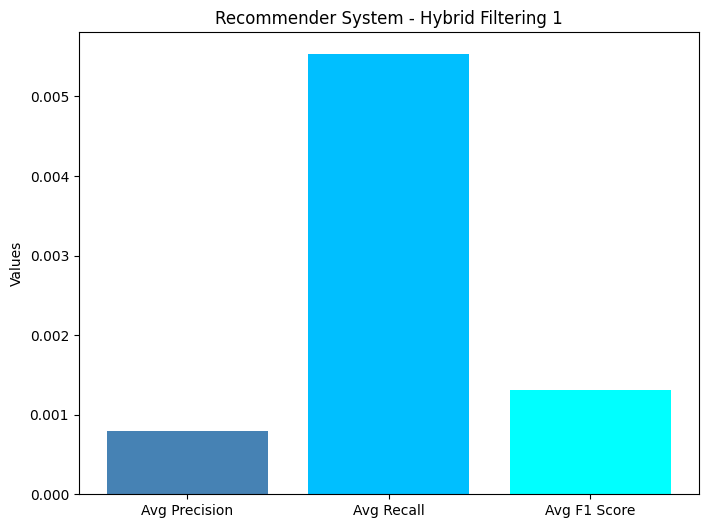

In [ ]:
import matplotlib.pyplot as plt

# Data
metrics = ['Avg Precision', 'Avg Recall', 'Avg F1 Score']
values = [avg_precision, avg_recall, avg_f1_score]

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['steelblue', 'deepskyblue', 'aqua'])

# Menambahkan judul dan label sumbu
plt.title('Recommender System - Hybrid Filtering 1')
plt.ylabel('Values')

# Menampilkan diagram
plt.show()


## Filter 1-3

In [ ]:
'''
avg_precision_2, avg_recall_2, avg_f1_score_2 = recommender_2.evaluate_model(n=10)
print(f"Avg Precision: {avg_precision_2}, Avg Recall: {avg_recall_2}, Avg F1 Score: {avg_f1_score_2}")
'''
# Tentukan path file .txt
file_txt_path_2 = '/content/drive/My Drive/Tugas Akhir/hasil_evaluasi/hasil_eval_2.txt'

# Baca dan tampilkan isi file
with open(file_txt_path_2, 'r') as file:
    content_2 = file.read()

print(content_2)

py parallel2.py
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
WeebFan 21729
   User_Id  Anime_Id  ...                                   Anime_Title                                        Anime_Genre
0  WeebFan     28755  ...                               Ashita no Joe 2      Action, Drama, Shounen, Slice of Life, Sports
1  WeebFan        15  ...                             Hayate no Gotoku!    Action, Harem, Comedy, Parody, Romance, Shounen
2  WeebFan      2921  ...                                  Eyeshield 21                    Action, Sports, Comedy, Shounen
3  WeebFan     31964  ...                     Phi Brain: Kami no Puzzle                     Action, Game, Mystery, Shounen
4  WeebFan      1470  ...                    

In [ ]:
# Running Di Device Lain
avg_precision_2 = 0.0012152760505023965
avg_recall_2 = 0.008376113399344614
avg_f1_score_2 = 0.001981069506771669
print("Recommender System - Hybrid Filtering 2")
print(f"Avg Precision: {avg_precision_2}, Avg Recall: {avg_recall_2}, Avg F1 Score: {avg_f1_score_2}")

Recommender System - Hybrid Filtering 2
Avg Precision: 0.0012152760505023965, Avg Recall: 0.008376113399344614, Avg F1 Score: 0.001981069506771669


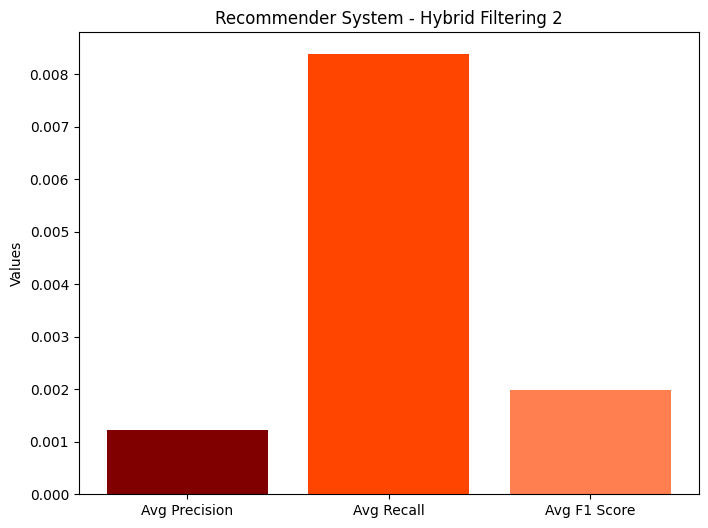

In [ ]:
import matplotlib.pyplot as plt

# Data
metrics = ['Avg Precision', 'Avg Recall', 'Avg F1 Score']
values = [avg_precision_2, avg_recall_2, avg_f1_score_2]

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['maroon', 'orangered', 'coral'])

# Menambahkan judul dan label sumbu
plt.title('Recommender System - Hybrid Filtering 2')
plt.ylabel('Values')

# Menampilkan diagram
plt.show()

## Filter 2-3

In [ ]:
'''
avg_precision_3, avg_recall_3, avg_f1_score_3 = recommender_3.evaluate_model(n=10)
print(f"Avg Precision: {avg_precision_3}, Avg Recall: {avg_recall_3}, Avg F1 Score: {avg_f1_score_3}")
'''
# Tentukan path file .txt
file_txt_path_3 = '/content/drive/My Drive/Tugas Akhir/hasil_evaluasi/hasil_eval_3.txt'

# Baca dan tampilkan isi file
with open(file_txt_path_3, 'r') as file:
    content_3 = file.read()

print(content_3)

E:\TA ALIF>py parallel3.py
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Tentology 17387
     User_Id  Anime_Id  ...                                        Anime_Title                                   Anime_Genre
0  Tentology     30407  ...               Ryoku Tama Shinshi: 10 Short Stories                                Comedy, Demons
1  Tentology     29629  ...                                Short Peace Opening                 Fantasy, Sci-Fi, Supernatural
2  Tentology     19573  ...                                       Hyakka Zukan                                        Comedy
3  Tentology      7244  ...                              Yoshichirou no Keirei                           Historical, Samurai
4  Tentology     36401

In [ ]:
# Running Di Device Lain
avg_precision_3 = 0.0007939442380167766
avg_recall_3 = 0.005438075305821149
avg_f1_score_3 = 0.0012931689829559251
print("Recommender System - Hybrid Filtering 3")
print(f"Avg Precision: {avg_precision_3}, Avg Recall: {avg_recall_3}, Avg F1 Score: {avg_f1_score_3}")

Recommender System - Hybrid Filtering 3
Avg Precision: 0.0007939442380167766, Avg Recall: 0.005438075305821149, Avg F1 Score: 0.0012931689829559251


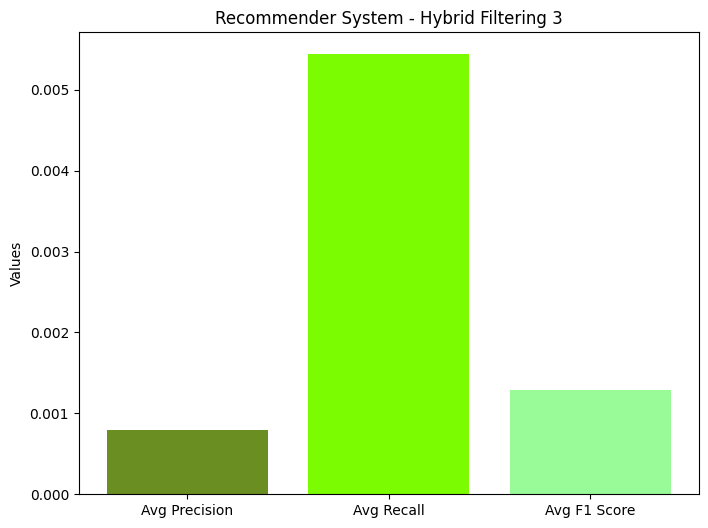

In [ ]:
import matplotlib.pyplot as plt

# Data
metrics = ['Avg Precision', 'Avg Recall', 'Avg F1 Score']
values = [avg_precision_3, avg_recall_3, avg_f1_score_3]

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['olivedrab', 'lawngreen', 'palegreen'])

# Menambahkan judul dan label sumbu
plt.title('Recommender System - Hybrid Filtering 3')
plt.ylabel('Values')

# Menampilkan diagram
plt.show()

## Perbandingan Evaluasi Performansi

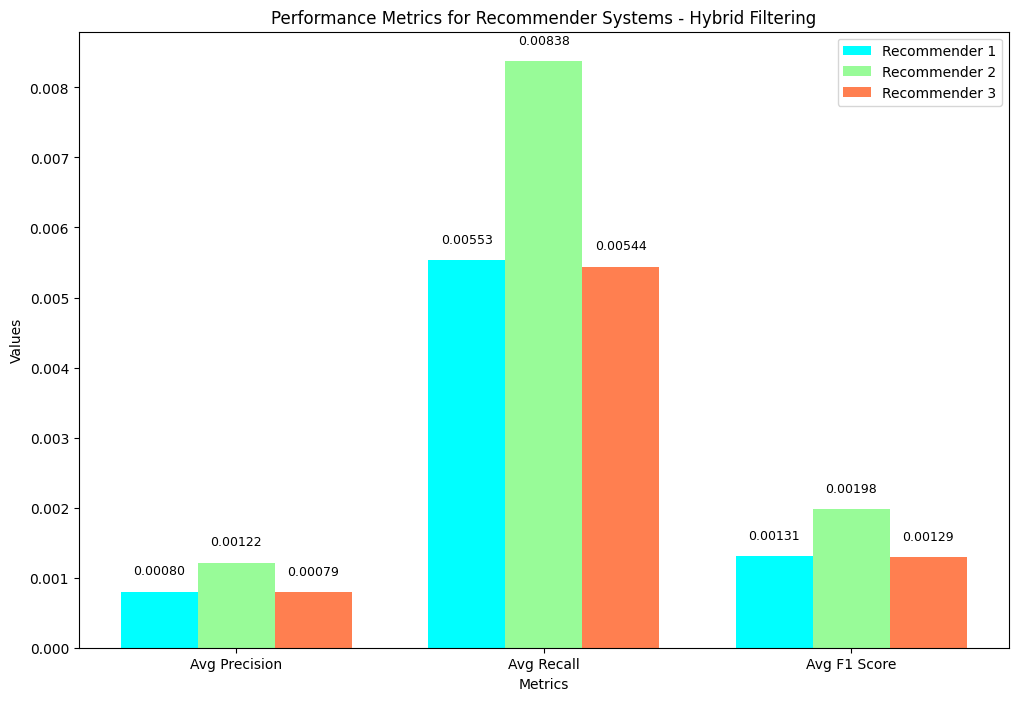

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Avg Precision', 'Avg Recall', 'Avg F1 Score']
recommender1 = [avg_precision, avg_recall, avg_f1_score]
recommender2 = [avg_precision_2, avg_recall_2, avg_f1_score_2]
recommender3 = [avg_precision_3, avg_recall_3, avg_f1_score_3]

# Lebar batang
bar_width = 0.25
# Posisi batang
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Membuat diagram batang
plt.figure(figsize=(12, 8))

# Warna untuk setiap recommender
color_recommender1 = 'aqua'
color_recommender2 = 'palegreen'
color_recommender3 = 'coral'

# Menggambar batang untuk recommender 1
for i in range(len(metrics)):
    bar = plt.bar(r1[i], recommender1[i], color=color_recommender1, width=bar_width, label='Recommender 1' if i == 0 else "")
    # Menambahkan nilai di atas batang
    plt.text(r1[i], recommender1[i] + 0.0002, f"{recommender1[i]:.5f}", ha='center', va='bottom', fontsize=9)

# Menggambar batang untuk recommender 2
for i in range(len(metrics)):
    bar = plt.bar(r2[i], recommender2[i], color=color_recommender2, width=bar_width, label='Recommender 2' if i == 0 else "")
    # Menambahkan nilai di atas batang
    plt.text(r2[i], recommender2[i] + 0.0002, f"{recommender2[i]:.5f}", ha='center', va='bottom', fontsize=9)

# Menggambar batang untuk recommender 3
for i in range(len(metrics)):
    bar = plt.bar(r3[i], recommender3[i], color=color_recommender3, width=bar_width, label='Recommender 3' if i == 0 else "")
    # Menambahkan nilai di atas batang
    plt.text(r3[i], recommender3[i] + 0.0002, f"{recommender3[i]:.5f}", ha='center', va='bottom', fontsize=9)

# Menambahkan judul, label sumbu, dan legenda
plt.title('Performance Metrics for Recommender Systems - Hybrid Filtering')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend()

# Menampilkan diagram
plt.show()